In [2]:
# This exercise is for Advanced Python Programming, a course presented in Maktabkhoone Course by Jadi 

In [4]:
pip install requests 

Note: you may need to restart the kernel to use updated packages.


In [182]:
pip install catboost

### import Libraries 

In [1]:
#import essential libraries 
import requests
from bs4 import BeautifulSoup
import re 
import pandas as pd 

import mysql.connector
from mysql.connector import Error

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings

## Fetch the Data from Truecar

In [103]:
def get_car_data(car_name, url, df): 
    r = requests.get(url)
    print(r)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    car_model_year = soup.find_all('div', {"data-test" : "vehicleCardYearMakeModel"})
    car_price = soup.find_all('div', {"data-test" : "vehicleCardPricingBlockPrice"})
    car_mileage = soup.find_all('div', {"data-test" : "vehicleMileage"})
    
    car_year1 = list()
    car_model1 = list()
    #car_model_year1 = list()
    car_price1 = list()
    car_mileage1 = list()

    for i in range(3, 30): 
        car_year1.append(car_model_year[i].text[0:4])
        car_model1.append(car_model_year[i].text[4:])
        #car_model_year1.append(car_model_year[i].text)
        a = car_price[i].text[1:]
        car_price1.append(int(a.replace(',', '')))
        a = car_mileage[i].text.strip()[:-5]
        car_mileage1.append(int(a.replace(',', '')))
    
    df1 = pd.DataFrame(list(zip(car_year1, car_model1, car_price1, car_mileage1)), columns =['Year','Model', 'Price', 'Mileage'])    
    df2 = df.append(df1, ignore_index=True)
    df2.head()
    #df.to_csv(r'C:\Users\Hassan\Desktop\Django_Course\used_cars.csv')
    
    #for i in range(3,30):
    #print(i-2 , "---", car_model_year[i].text, "----", car_price[i].text, "----", car_mileage[i].text)
        
    return df2 

In [104]:
car_name = 'bmw'
url = "https://www.truecar.com/used-cars-for-sale/listings/" + car_name    
df = pd.DataFrame()

df = get_car_data(car_name, url, df) 


<Response [200]>


C:\Users\Hassan\AppData\Local\Temp\ipykernel_1588\1402950902.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df.append(df1, ignore_index=True)


In [105]:
df

,Year,Model,Price,Mileage
0,2020,BMW 3 Series,28998,36577
1,2011,BMW 3 Series,6495,167459
2,2020,BMW 3 Series,31991,36234
3,2020,BMW 3 Series,32987,20679
4,2017,BMW i8,68991,29446
5,2020,BMW 3 Series,34885,35169
6,2020,BMW 3 Series,33505,23583
7,2014,BMW X5,24995,58967
8,2020,BMW 3 Series,26624,59729
9,2020,BMW X3,35990,35068


In [106]:
df.dtypes

Year       object
Model      object
Price       int64
Mileage     int64
dtype: object

In [109]:
#https://www.truecar.com/used-cars-for-sale/listings/bmw/?page=2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for i in range(2,5): 
    url = "https://www.truecar.com/used-cars-for-sale/listings/" + car_name + "/?page=" + str(i) 
    print(url)
    df = get_car_data(car_name, url, df) 

    

https://www.truecar.com/used-cars-for-sale/listings/bmw/?page=2
<Response [200]>
https://www.truecar.com/used-cars-for-sale/listings/bmw/?page=3
<Response [200]>
https://www.truecar.com/used-cars-for-sale/listings/bmw/?page=4
<Response [200]>


In [110]:
df.tail

<bound method NDFrame.tail of      Year          Model  Price  Mileage
0    2020   BMW 3 Series  28998    36577
1    2011   BMW 3 Series   6495   167459
2    2020   BMW 3 Series  31991    36234
3    2020   BMW 3 Series  32987    20679
4    2017         BMW i8  68991    29446
..    ...            ...    ...      ...
103  2015         BMW X5  17455   110314
104  2021   BMW 3 Series  34287    32951
105  2020   BMW 5 Series  39389     8457
106  2021   BMW 3 Series  31998    41588
107  2020   BMW 3 Series  29666    44209

[108 rows x 4 columns]>

## Save the Data in DB 

### Check Availability of MySQL - Connection Check 

In [111]:
try:
    connection = mysql.connector.connect(host='localhost', database='car_data', user='admin', password='')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


Connected to MySQL Server version  5.5.5-10.1.37-MariaDB
You're connected to database:  ('car_data',)
MySQL connection is closed


### Create a New Database for BMW Data 

In [98]:
try:
    connection = mysql.connector.connect(host='localhost', database='car_data', user='admin',password='')

    mySql_Create_Table_Query = """CREATE TABLE BMW ( 
                             Id int(11) NOT NULL,
                             Year varchar(250) NOT NULL,
                             Model varchar(250) NOT NULL,
                             Price float NOT NULL,
                             Milage float NOT NULL,
                             PRIMARY KEY (Id)) """

    cursor = connection.cursor() 
    result = cursor.execute(mySql_Create_Table_Query)
    print("BMW Table created successfully ")
    
    #cursor.execute('INSERT INTO bmw VALUES (\'Amir\',\'Far\',\'Niki\') ')
    connection.commit()
    cursor.close()

except mysql.connector.Error as error:
    print("Failed to create table in MySQL: {}".format(error))
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


Failed to create table in MySQL: 1050 (42S01): Table 'bmw' already exists
MySQL connection is closed


### Insert Data into the BMW DB 

In [112]:
connection = mysql.connector.connect(host='localhost', database='car_data', user='admin', password='')
print("Connected to DB")

cursor = connection.cursor() 

for i in range(0,107): 
    sql = "INSERT INTO bmw (id, year, model, price, milage) VALUES (%s, %s, %s, %s, %s)"
    val = (str(i), df["Year"][i], df["Model"][i], int(df["Price"][i]), int(df["Mileage"][i]) )          
    cursor.execute(sql, val)

connection.commit()

cursor.close()
connection.close()
print("Data entered successfully.")

Connected to DB
Data entered successfully.


## Basic Understanding of Data

In [116]:
df.shape

(108, 4)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     108 non-null    object
 1   Model    108 non-null    object
 2   Price    108 non-null    int64 
 3   Mileage  108 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.5+ KB


In [114]:
df.describe()


,Price,Mileage
count,108.000000,108.000000
mean,29356.527778,60178.611111
std,15343.418342,37543.722977
min,5995.000000,2509.000000
25%,17857.000000,32931.250000
50%,29163.500000,50478.500000
75%,35911.250000,78843.750000
max,94992.000000,167459.000000


In [113]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Year,0
Model,0
Price,0
Mileage,0


In [117]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


In [118]:
df.select_dtypes(include="object").head()

,Year,Model
0,2020,BMW 3 Series
1,2011,BMW 3 Series
2,2020,BMW 3 Series
3,2020,BMW 3 Series
4,2017,BMW i8


In [121]:
print(df["Model"].unique()) 
len(df["Model"].unique()) 

[' BMW 3 Series' ' BMW i8' ' BMW X5' ' BMW X3' ' BMW X5 M' ' BMW 5 Series'
 ' BMW i3' ' BMW iX' ' BMW 8 Series' ' BMW X7' ' BMW 7 Series' ' BMW X1'
 ' BMW Z3' ' BMW M6' ' BMW X6 M']


15

In [122]:
print(df["Year"].unique()) 
len(df["Year"].unique()) 

['2020' '2011' '2017' '2014' '2008' '2009' '2012' '2019' '2016' '2013'
 '2021' '2018' '2022' '2015' '1997']


15

## Data Cleaning 

باید مدل‌ها را درست کنم. 

## Exploratory Data Analysis (EDA)

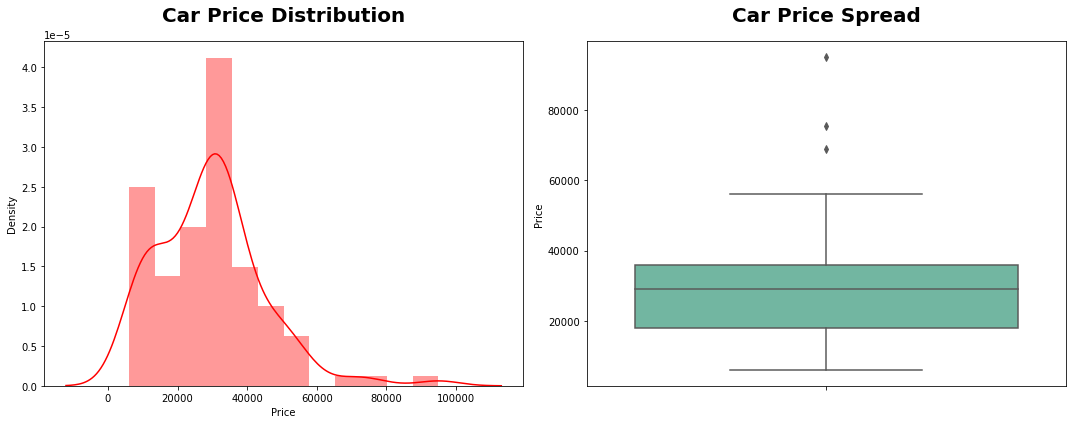

In [127]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["Price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["Price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

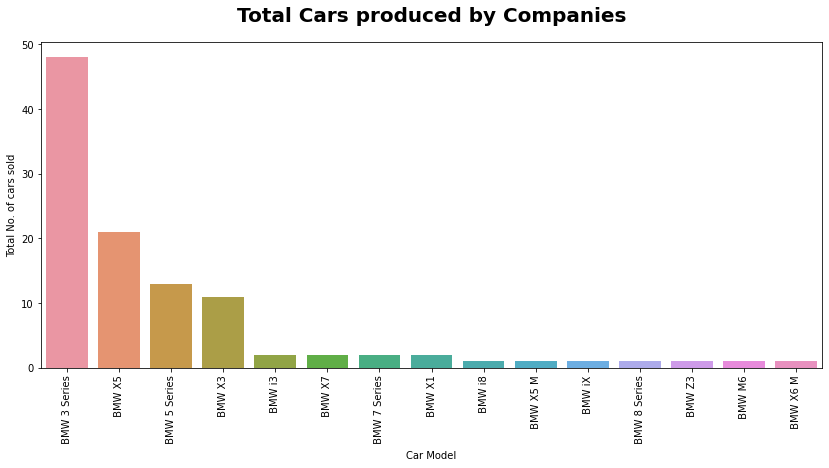

In [128]:
plt.figure(figsize=(14,6))
counts = df["Model"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Model")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

### Visualizing Car Company w.r.t Price

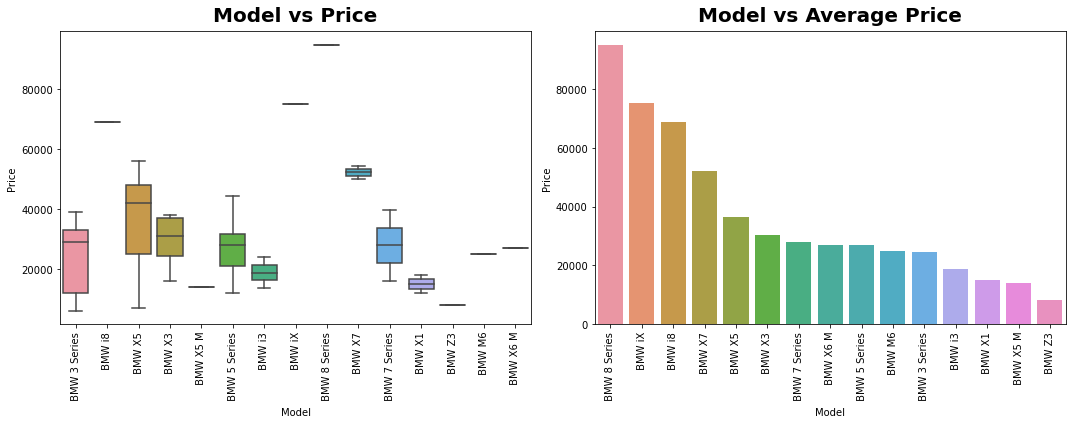

In [131]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="Model",y="Price",data=df)
plt.xticks(rotation=90)
plt.title("Model vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby("Model")["Price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="Price",data=x) 
plt.xticks(rotation=90)
plt.title("Model vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
Visualizing "WheelBase" & "Curbweight" Features

In [134]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="Price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

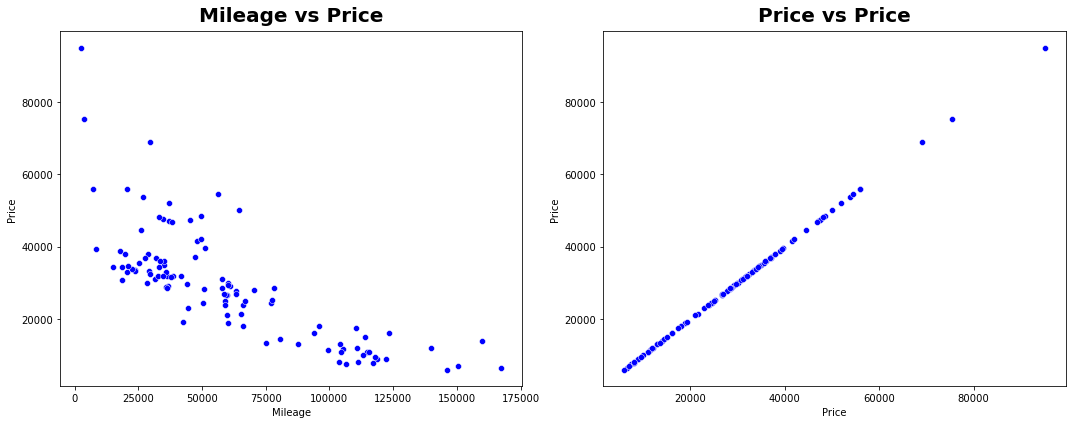

In [135]:
scatter_plot(["Mileage","Price"])

## Data Preprocessiong

In [ ]:
#1. Creating new DataFrame with all the useful Features.

In [170]:
new_df = df[['Price','Mileage']]

In [ ]:
#2.Creating Dummies Variables for all the Categorical Features.

In [171]:
# 3. Feature Scaling of Numerical Data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = ['Price','Mileage']

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [172]:
new_df.head()

,Price,Mileage
0,-0.023476,-0.631574
1,-1.496936,2.870800
2,0.172501,-0.640753
3,0.237717,-1.057001
4,2.595201,-0.822398


### Selecting Features & Labels for Model Training & Testing

In [173]:
x = new_df.drop(columns=["Price"])
y = new_df["Price"]

In [141]:
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


ModuleNotFoundError: No module named 'catboost'

### Splitting Data for Model Traning & Testing.

In [174]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [175]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (86, 1)
x_test - >   (22, 1)
y_train - >   (86,)
y_test - >   (22,)


## Model Building

In [176]:
training_score = []
testing_score = []

In [177]:
from sklearn.metrics import r2_score
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

### Linear-Regression Model

In [163]:
model_prediction(LinearRegression())


r2_Score of LinearRegression() model on Training Data is: 61.53803924819792
r2_Score of LinearRegression() model on Testing Data is: 56.906150898767024


### Decision-Tree-Regressor Model

In [164]:
model_prediction(DecisionTreeRegressor())


r2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
r2_Score of DecisionTreeRegressor() model on Testing Data is: 26.388485295911924


### Random-Forest-Regressor Model

In [165]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 96.52558592100247
r2_Score of RandomForestRegressor() model on Testing Data is: 40.885493937440664


In [166]:
#Ada-Boost-Regressor Model
model_prediction(AdaBoostRegressor())


r2_Score of AdaBoostRegressor() model on Training Data is: 83.86454572479998
r2_Score of AdaBoostRegressor() model on Testing Data is: 38.29058693682882


In [167]:
#Gradient-Boosting-Regressor Model
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 98.70595390414887
r2_Score of GradientBoostingRegressor() model on Testing Data is: 25.49594768810489


In [178]:
#LGMB Regressor Model
from lightgbm import LGBMRegressor

model_prediction(LGBMRegressor())

r2_Score of LGBMRegressor() model on Training Data is: 58.73972576820839
r2_Score of LGBMRegressor() model on Testing Data is: 54.48524905579477


In [179]:
#XGBRegressor Model
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) model on Training Data is: 99.98770281350177
r2_Score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metri

In [181]:
#Cat-Boost-Regressor Model
from catboost import CatBoostRegressor
model_prediction(CatBoostRegressor(verbose=False))

ModuleNotFoundError: No module named 'catboost'

## All Model Performance Comparison

In [183]:
models = ["Linear Regression","Decision Tree",
          "Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]

In [ ]:
df_models = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [ ]:
df_models

In [ ]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()